In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

df = pd.read_csv("../data/orig_train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [3]:
SHOW_ROWS = 4
columns = ["dtype", "missing"] + [f"example_row_{i + 1}" for i in range(SHOW_ROWS)]

pd.DataFrame(np.c_[df.dtypes, pd.isna(df).sum(), df.head(SHOW_ROWS).T], index=df.columns, columns=columns)

,dtype,missing,example_row_1,example_row_2,example_row_3,example_row_4
PRODUCT,object,0,C,C,F,C
AGE,int64,0,65,64,30,39
AREA,object,0,County capital,County capital,Urban area,County capital
RESIDENTIAL_PLACE,object,0,Owner without mortgage,Owner without mortgage,Living with family,Owner without mortgage
EDUCATION,object,0,University,University,University,Post-graduate
MARITAL_STATUS,object,0,married,married,married,divorced
HOUSEHOLD_MEMBERS,int64,0,2,2,2,1
NO_OF_DEPENDENTS,int64,0,0,0,0,0
INCOME,float64,0,1245.0,1380.0,1131.0,1730.0
WORK_SENIORITY,int64,0,5,5,2,9


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,15097.0,43.584553,13.460964,19.0,32.00,42.000,56.0,74.0
HOUSEHOLD_MEMBERS,15097.0,1.717229,0.759843,1.0,1.00,2.000,2.0,5.0
NO_OF_DEPENDENTS,15097.0,0.199510,0.493135,0.0,0.00,0.000,0.0,4.0
INCOME,15097.0,1958.071916,1772.153274,0.0,1007.42,1426.495,2290.0,40621.6
WORK_SENIORITY,15097.0,6.647347,5.647763,1.0,3.00,5.000,8.0,46.0
BUSINESS AGE,15097.0,17.938001,12.477914,1.0,12.00,16.000,21.0,116.0
LENGTH_RELATIONSHIP_WITH_CLIENT,15097.0,4.996556,4.900952,1.0,1.00,2.000,10.0,110.0
DEBIT_CARD,15097.0,0.384116,0.486402,0.0,0.00,0.000,1.0,1.0
CURRENT_ACCOUNT,15097.0,0.485461,0.499805,0.0,0.00,0.000,1.0,1.0
SAVING_ACCOUNT,15097.0,0.000397,0.019932,0.0,0.00,0.000,0.0,1.0


Checking duplicate values

In [15]:
df.nunique()

PRODUCT                               6
AGE                                  53
AREA                                  4
RESIDENTIAL_PLACE                     5
EDUCATION                            10
MARITAL_STATUS                        4
HOUSEHOLD_MEMBERS                     5
NO_OF_DEPENDENTS                      5
INCOME                             7963
WORK_SENIORITY                       45
BUSINESS AGE                        108
ECONOMIC_SECTOR                      18
EMPLOYEE_NO                           9
LENGTH_RELATIONSHIP_WITH_CLIENT      23
DEBIT_CARD                            2
CURRENT_ACCOUNT                       2
SAVING_ACCOUNT                        2
SALARY_ACCOUNT                        2
FOREIGN_ACCOUNT                       2
FINALIZED_LOAN                        2
DEPOSIT                               2
DEFAULT_FLAG                          2
dtype: int64

In [5]:
df.describe(include="object").T

,count,unique,top,freq
PRODUCT,15097,6,C,6779
AREA,15097,4,County capital,7586
RESIDENTIAL_PLACE,15097,5,Owner without mortgage,8457
EDUCATION,15097,10,University,5457
MARITAL_STATUS,15097,4,married,8141
ECONOMIC_SECTOR,15097,18,Missing,4009
EMPLOYEE_NO,15097,9,Missing,3338


From below list we can clearly say that **Missing** is a key word to indicate missing values in a dataset for categorical variables.

In [6]:
CATEGORICAL = list(df.describe(include="object").columns)
print(f"{'COLUMN NAME':20s}{'CAT NUM':10s}CATEGORIES")
for col in CATEGORICAL:
    print(f"{col:20s}{len(df[col].unique()):<10}{', '.join([f'{name}({count})' for name, count in df[col].value_counts().items()])}")

COLUMN NAME         CAT NUM   CATEGORIES
PRODUCT             6         C(6779), B(3407), F(3334), E(1522), A(42), D(13)
AREA                4         County capital(7586), Rural area(4192), Urban area(3286), Missing(33)
RESIDENTIAL_PLACE   5         Owner without mortgage(8457), Living with family(5505), Owner with mortgage(861), Other(246), Rental(28)
EDUCATION           10        University(5457), Highschool(3451), Post secondary school(1620), Vocational school(1228), Post-graduate(1046), Other(819), Missing(691), College(562), Middle school(195), Primary school(28)
MARITAL_STATUS      4         married(8141), single(5113), divorced(1045), widow(798)
ECONOMIC_SECTOR     18        Missing(4009), Manufacturing(3093), Wholesale and retail trade(1413), Public administration and defence(1257), Other(840), Transportation and storage(691), Human health and social work activities(668), Information and communication(517), Education(460), Professional, scientific and technical activities(393),

In [7]:
print(f"{'COLUMN NAME':20s}{'MISSING NUM':15s}MISSING %")
MISSING_CATEGORICAL = []
for col in CATEGORICAL:
    missing = np.sum(df[col] == 'Missing')
    print(f"{col:20s}{missing:<15}{missing/len(df):.2f}")
    
    if missing > 0:
        MISSING_CATEGORICAL.append(col)

COLUMN NAME         MISSING NUM    MISSING %
PRODUCT             0              0.00
AREA                33             0.00
RESIDENTIAL_PLACE   0              0.00
EDUCATION           691            0.05
MARITAL_STATUS      0              0.00
ECONOMIC_SECTOR     4009           0.27
EMPLOYEE_NO         3338           0.22


C:\Users\micha\AppData\Local\Temp\ipykernel_3104\1595550871.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col_name], color='red', linewidth=3, fill=True, ax=axes[i])


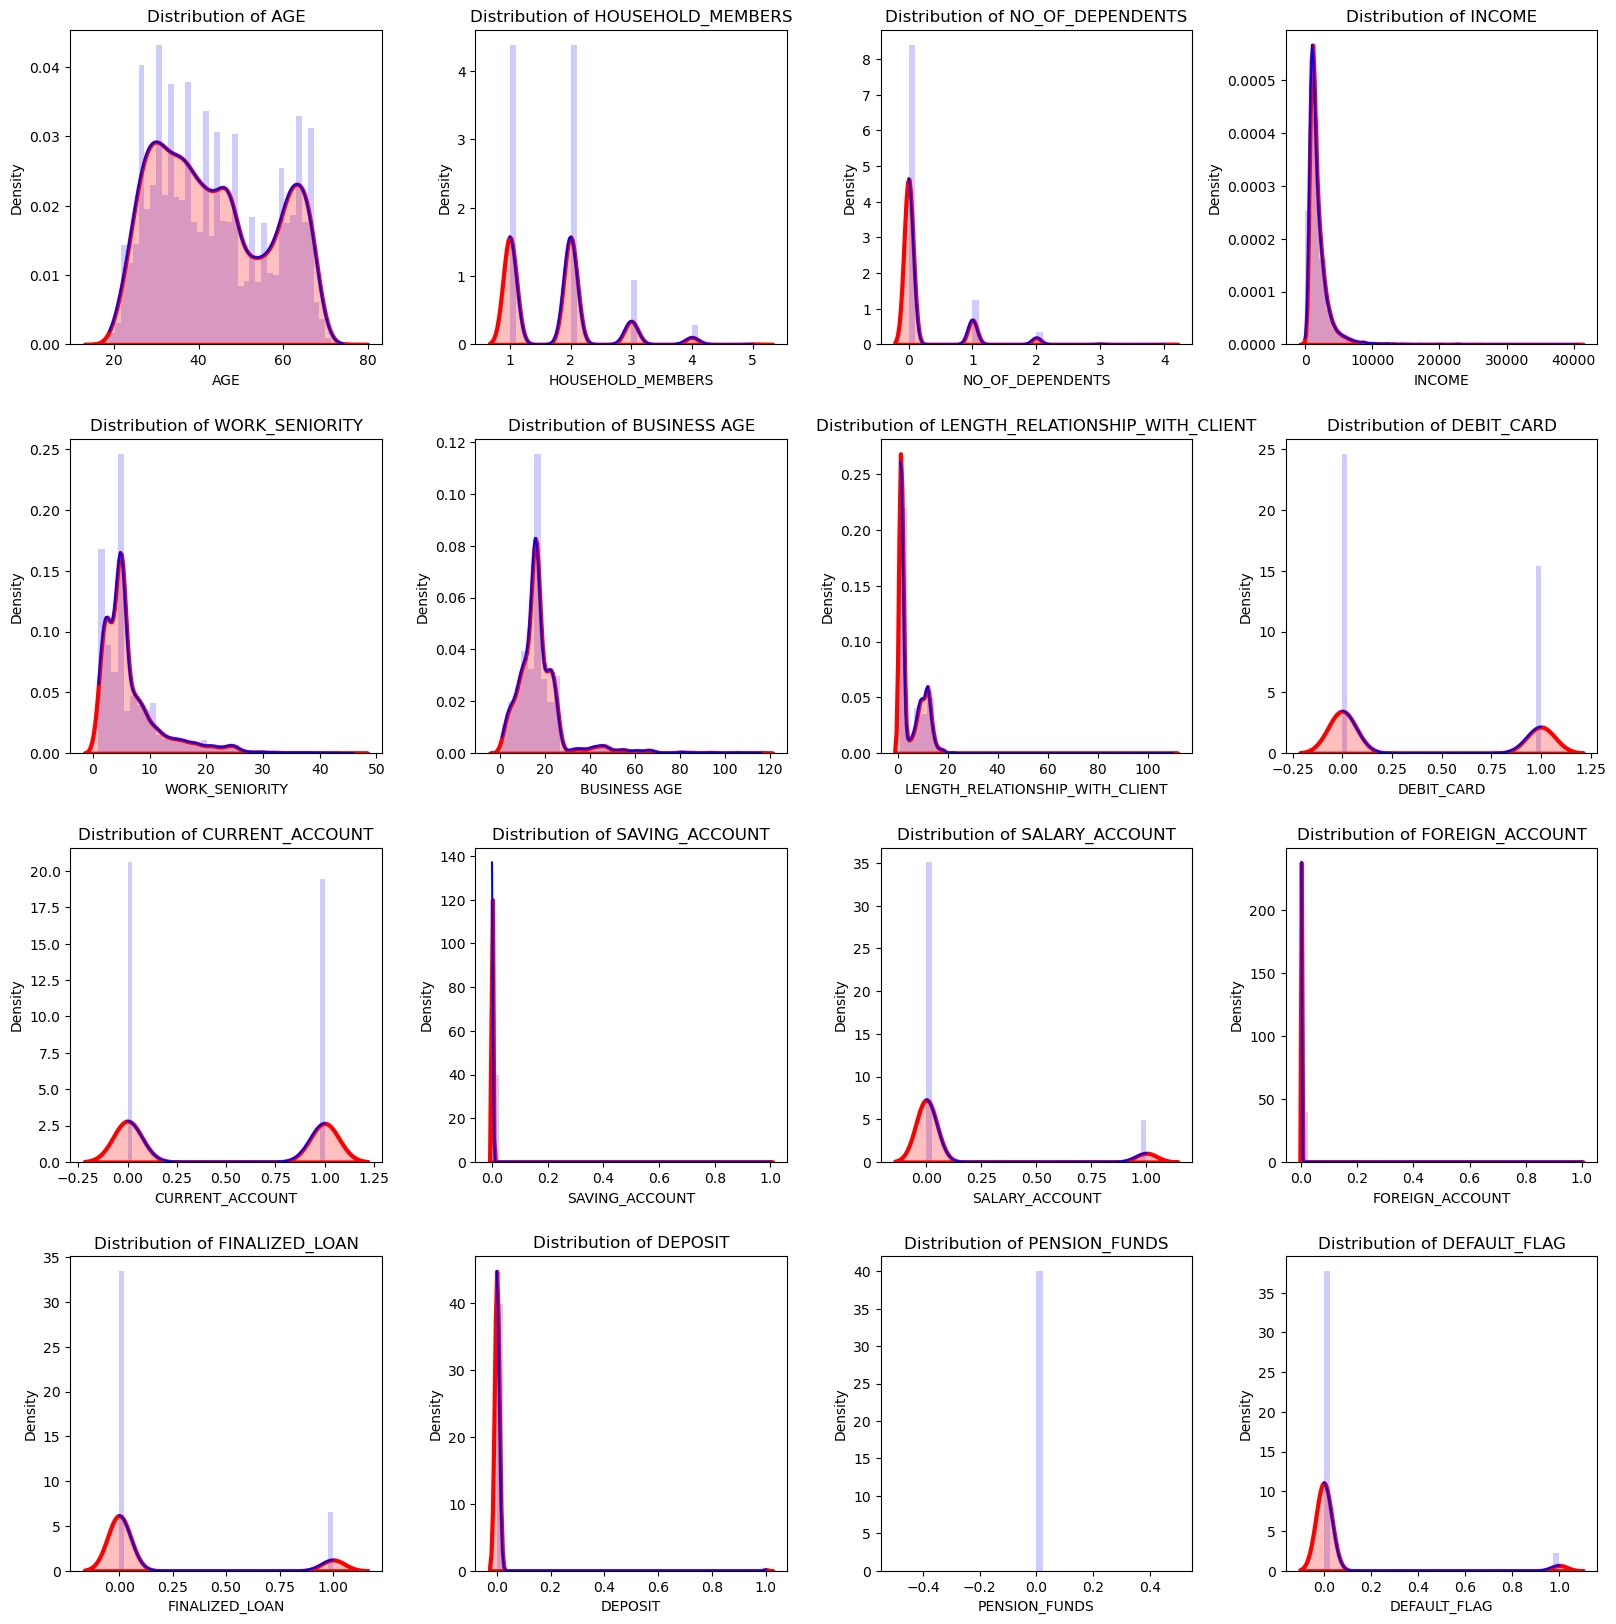

In [8]:
import math

NUMERICAL = list(df.describe().columns)
COLS = 4
ROWS = math.ceil(len(NUMERICAL) / COLS)

fig, axes = plt.subplots(ROWS, COLS, figsize=(ROWS * 4, COLS * 4))
axes = axes.flatten()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, col_name in enumerate(NUMERICAL):
    sns.histplot(df[col_name], kde=True, color='blue', stat='density', ax=axes[i], bins=40, alpha=0.2, linewidth=0)
    sns.kdeplot(df[col_name], color='red', linewidth=3, fill=True, ax=axes[i])
    
    axes[i].set_title(f"Distribution of {col_name}")
    
plt.show()

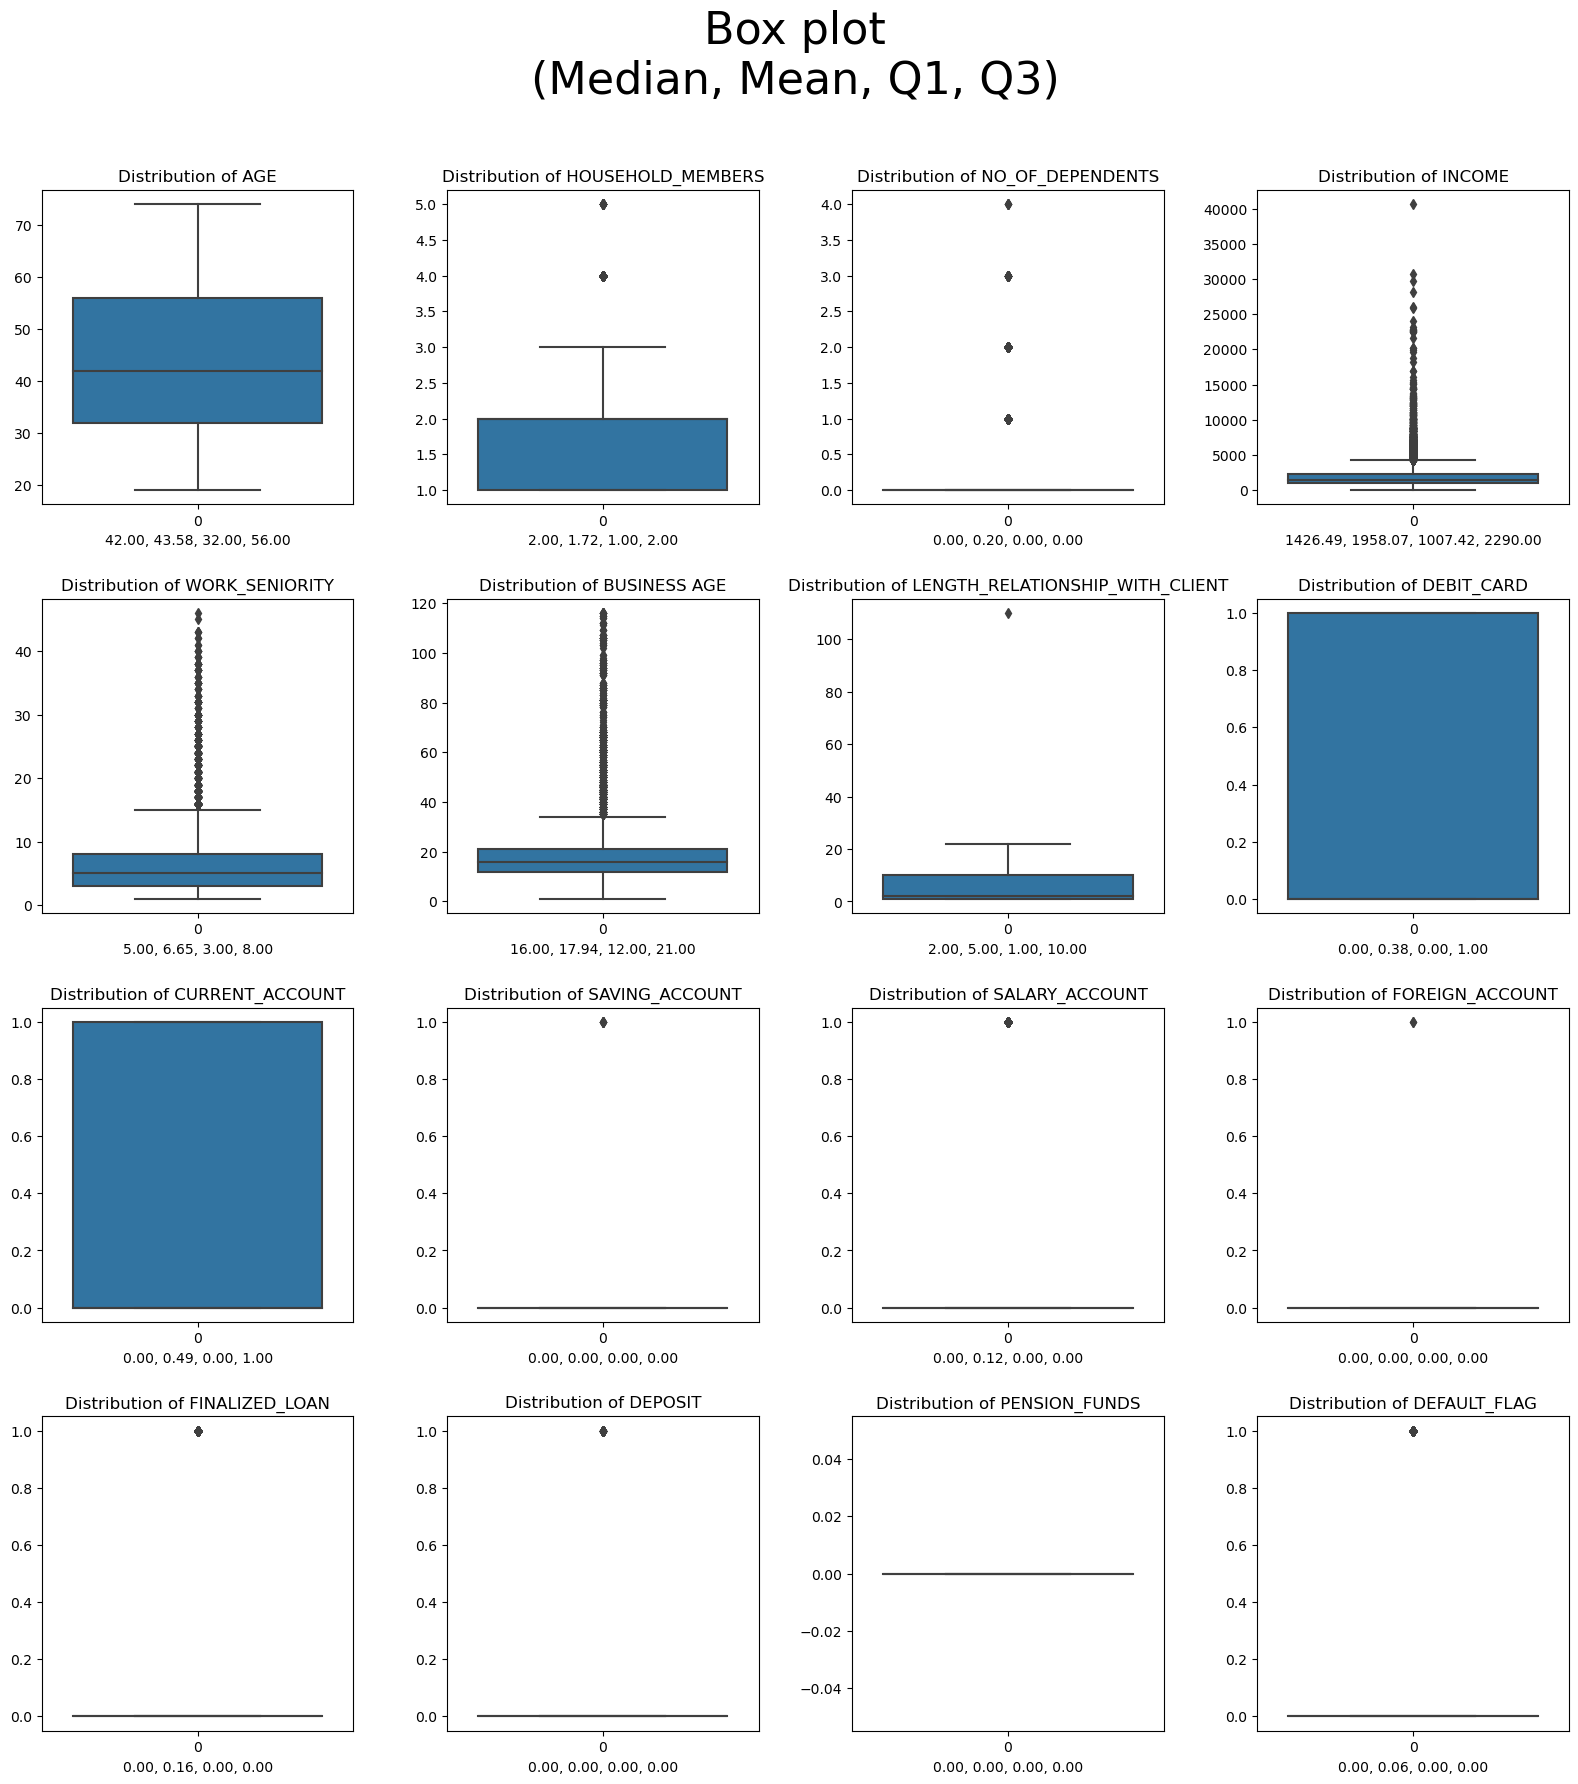

In [9]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(ROWS * 4, COLS * 4))
axes = axes.flatten()
fig.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle("Box plot\n(Median, Mean, Q1, Q3)", fontsize=32, y=1.1)

for i, col_name in enumerate(NUMERICAL):
    sns.boxplot(df[col_name], ax=axes[i])
    axes[i].set_title(f"Distribution of {col_name}")
    axes[i].set_xlabel(", ".join([f"{val:.2f}" for val in [np.median(df[col_name]), np.mean(df[col_name]), np.percentile(df[col_name], 25), np.percentile(df[col_name], 75)]]))
    
plt.show()

Pension founds is useless we can drop it

In [10]:
print(np.unique(df["PENSION_FUNDS"]))
df.drop(["PENSION_FUNDS"], axis=1, inplace=True)
NUMERICAL.remove("PENSION_FUNDS")

[0]


In [11]:
def plot_corr(corr, threshold_up=0.8, threshold_down=0.01):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    heatmap = sns.heatmap(corr, mask=mask, linewidths=0.5, cmap="bwr")
    
    for i in range(len(corr)):
        for j in range(len(corr)):
            corr_val = corr.iloc[i, j]
            if i > j and abs(corr_val) >= threshold_up:
                heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='green'))
                plt.text(j + 0.5, i + 0.6, f"{corr_val:1.2f}", ha='center', va='center', fontsize=7, color='white')
            if i > j and abs(corr_val) <= threshold_down:
                heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='gray'))
                plt.text(j + 0.5, i + 0.6, f"{corr_val:1.2f}", ha='center', va='center', fontsize=7, color='white')
    return heatmap

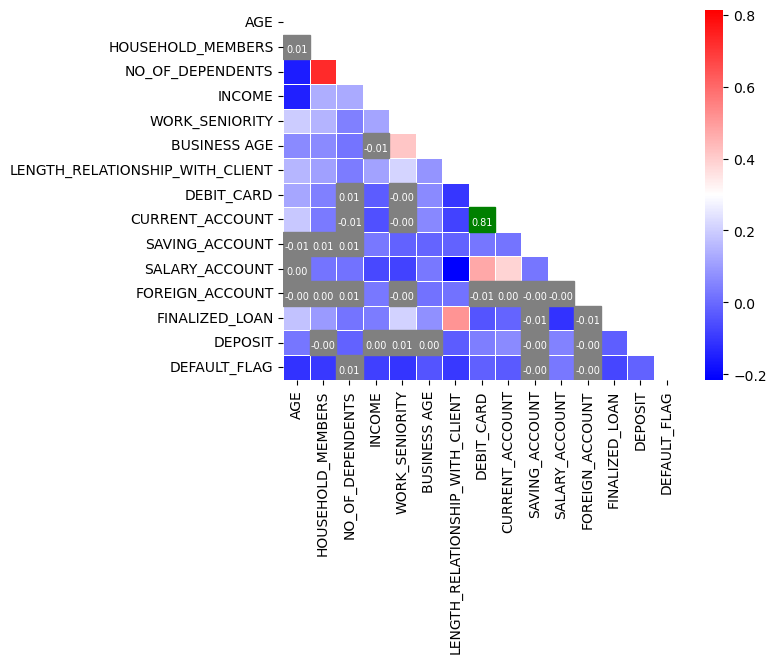

In [12]:
corr = df.corr(numeric_only=True)
plot_corr(corr)
plt.show()

<Axes: xlabel='NO_OF_DEPENDENTS', ylabel='HOUSEHOLD_MEMBERS'>

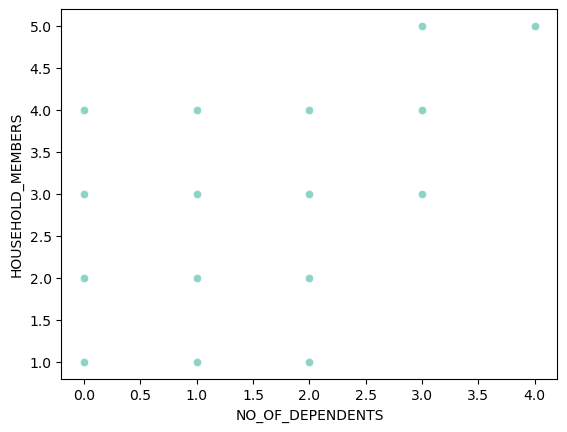

In [67]:

sns.scatterplot(x = "NO_OF_DEPENDENTS", y = "HOUSEHOLD_MEMBERS", data = df)


<Axes: xlabel='MARITAL_STATUS', ylabel='AGE'>

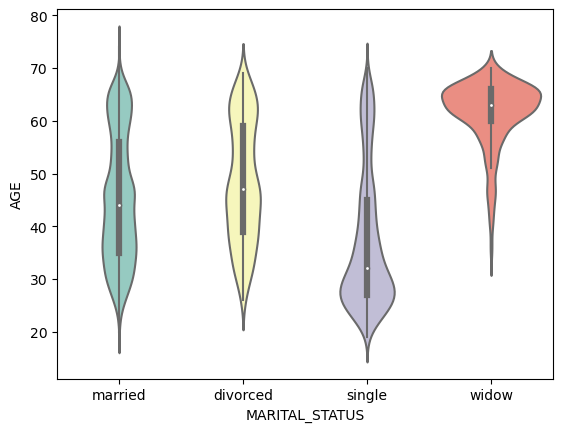

In [56]:
sns.violinplot(x = "MARITAL_STATUS", y = "AGE", data= df)

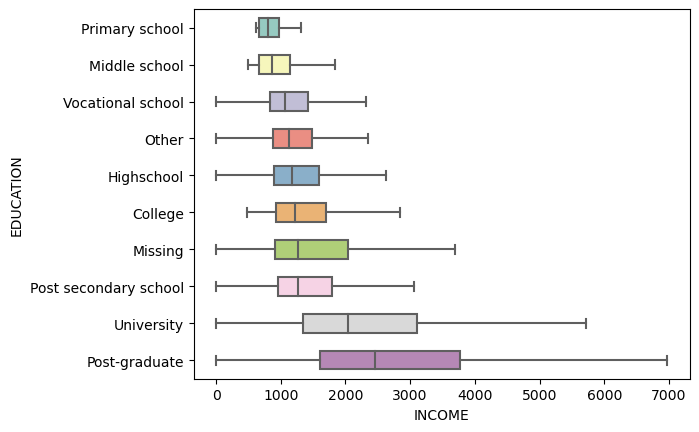

In [47]:
order_by_median = df.groupby("EDUCATION")["INCOME"].median().sort_values().index
sns.boxplot(y = "EDUCATION", x = "INCOME", width=0.5,data = df, showfliers=False, order=order_by_median)

plt.show()

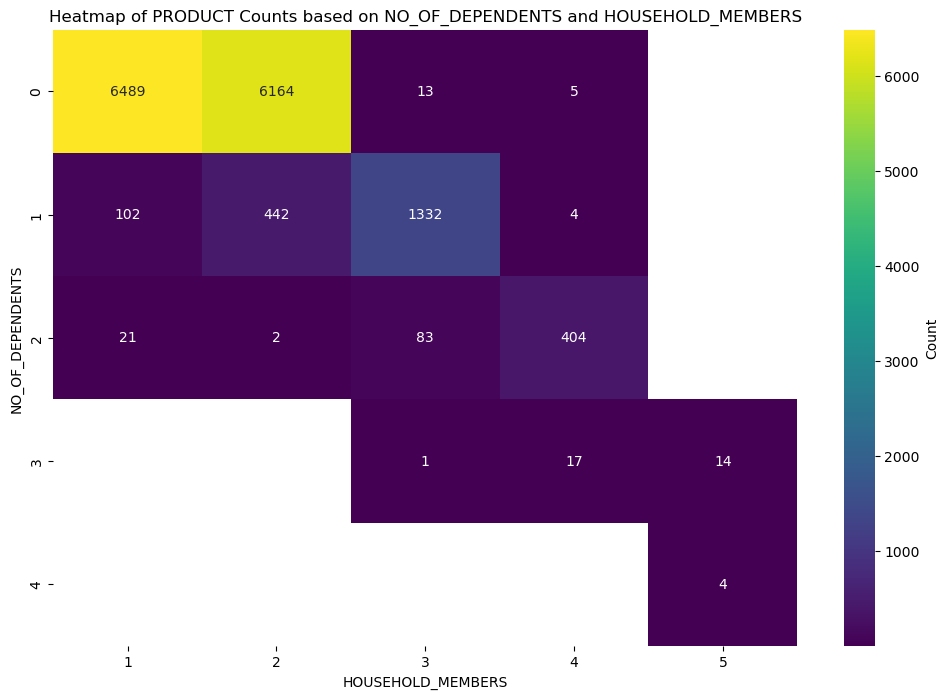

In [79]:
heatmap_data = df.pivot_table(index='NO_OF_DEPENDENTS', columns='HOUSEHOLD_MEMBERS', values='PRODUCT', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Count'})
plt.title('Heatmap of PRODUCT Counts based on NO_OF_DEPENDENTS and HOUSEHOLD_MEMBERS')
plt.xlabel('HOUSEHOLD_MEMBERS')
plt.ylabel('NO_OF_DEPENDENTS')
plt.show()


c:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x640 with 0 Axes>

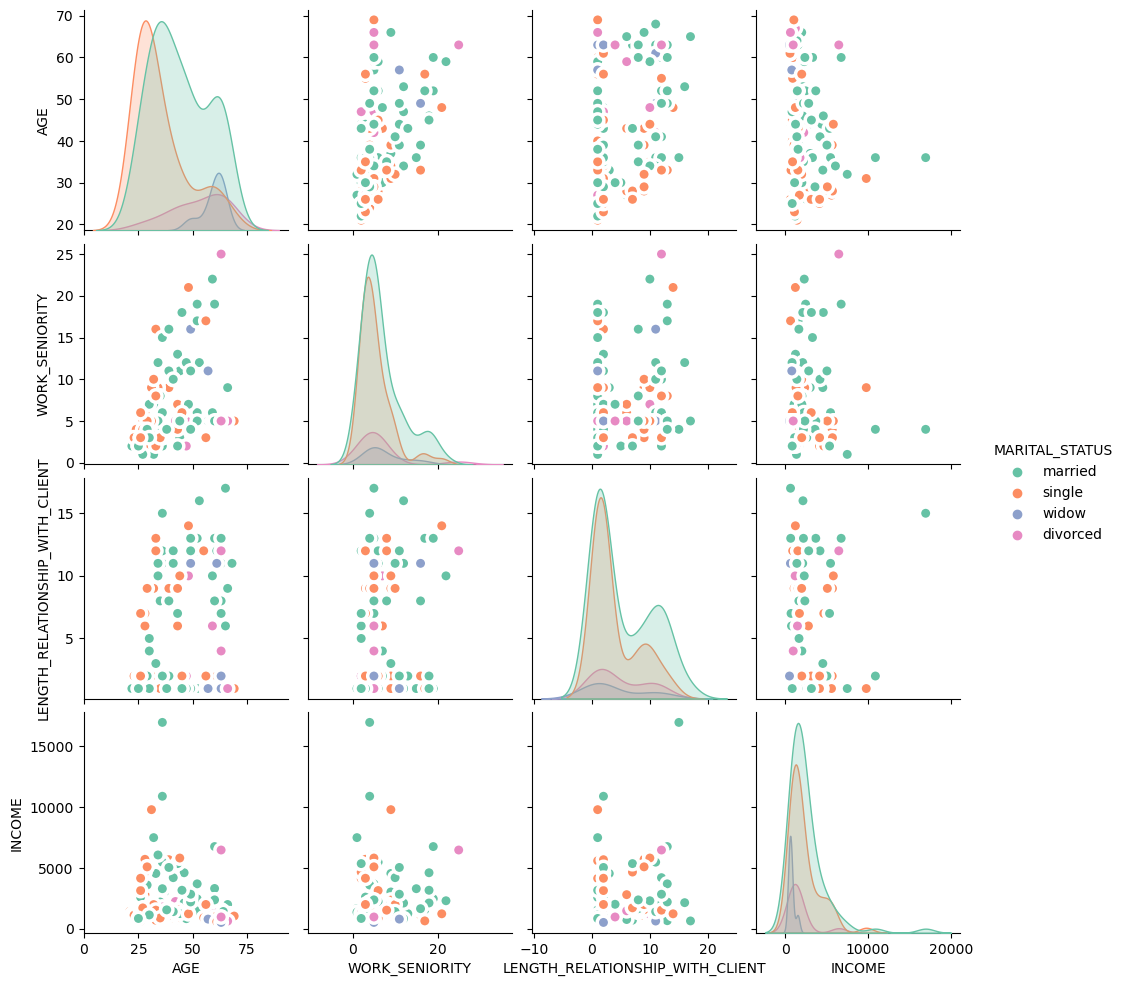

In [104]:



selected_columns = ['AGE', 'MARITAL_STATUS', 'WORK_SENIORITY', 'LENGTH_RELATIONSHIP_WITH_CLIENT', 'INCOME']
subset_df = df[selected_columns].sample(frac=0.01, random_state=42) 


plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(subset_df, kind="scatter", hue="MARITAL_STATUS", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5), palette="Set2")
plt.show()

